## Importing Libraries


In [ ]:
# Impoprting all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from   statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



import warnings
warnings.filterwarnings('ignore')

##Understanding data

In [ ]:
#Loading dataset in DataFrame and its shape
data=pd.read_csv("train.csv")
print(data.shape)
data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [ ]:
# Summary of the dataset : 1460 rows, 81 columns

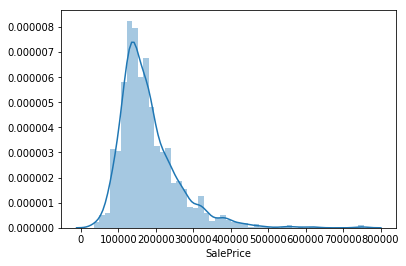

In [ ]:
sns.distplot(data['SalePrice'])

In [ ]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


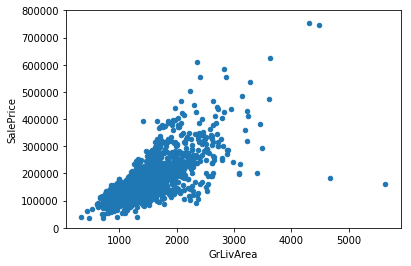

In [ ]:
var = 'GrLivArea'
data45 = pd.concat([data['SalePrice'], data[var]], axis=1)
data45.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

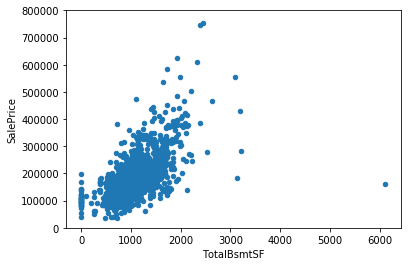

In [ ]:
var = 'TotalBsmtSF'
data45 = pd.concat([data['SalePrice'], data[var]], axis=1)
data45.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

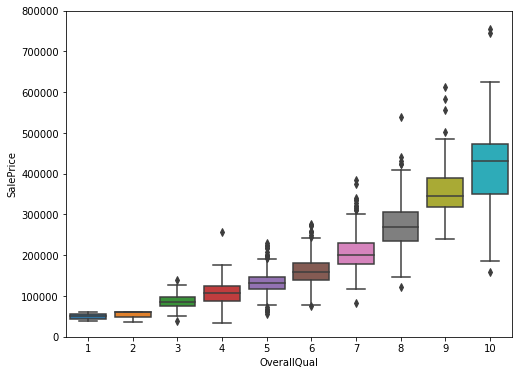

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data45 = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data45)
fig.axis(ymin=0, ymax=800000);

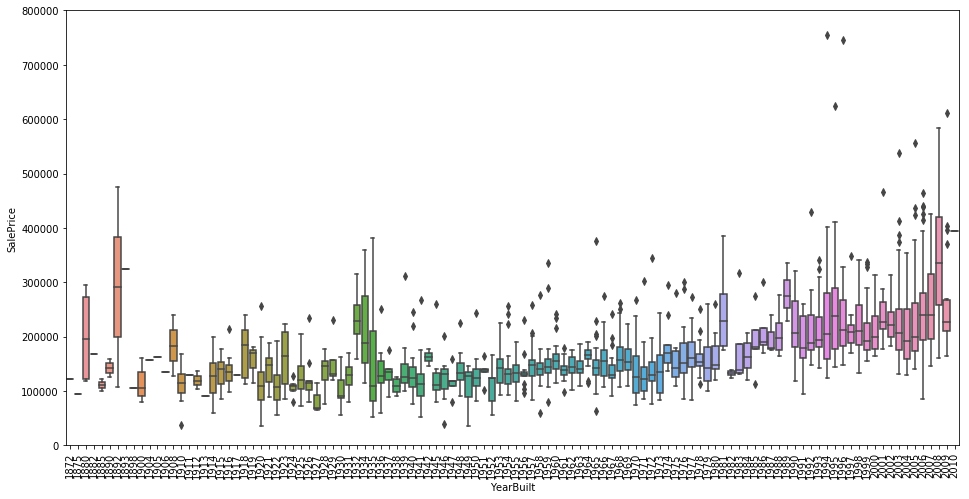

In [ ]:
var = 'YearBuilt'
data45 = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data45)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

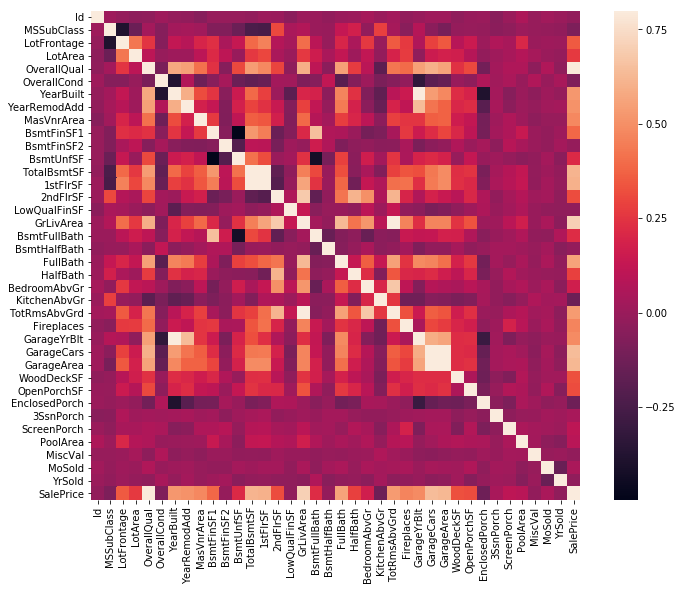

In [ ]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

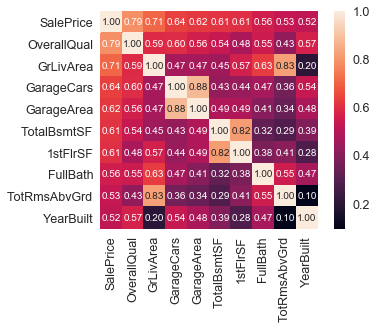

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

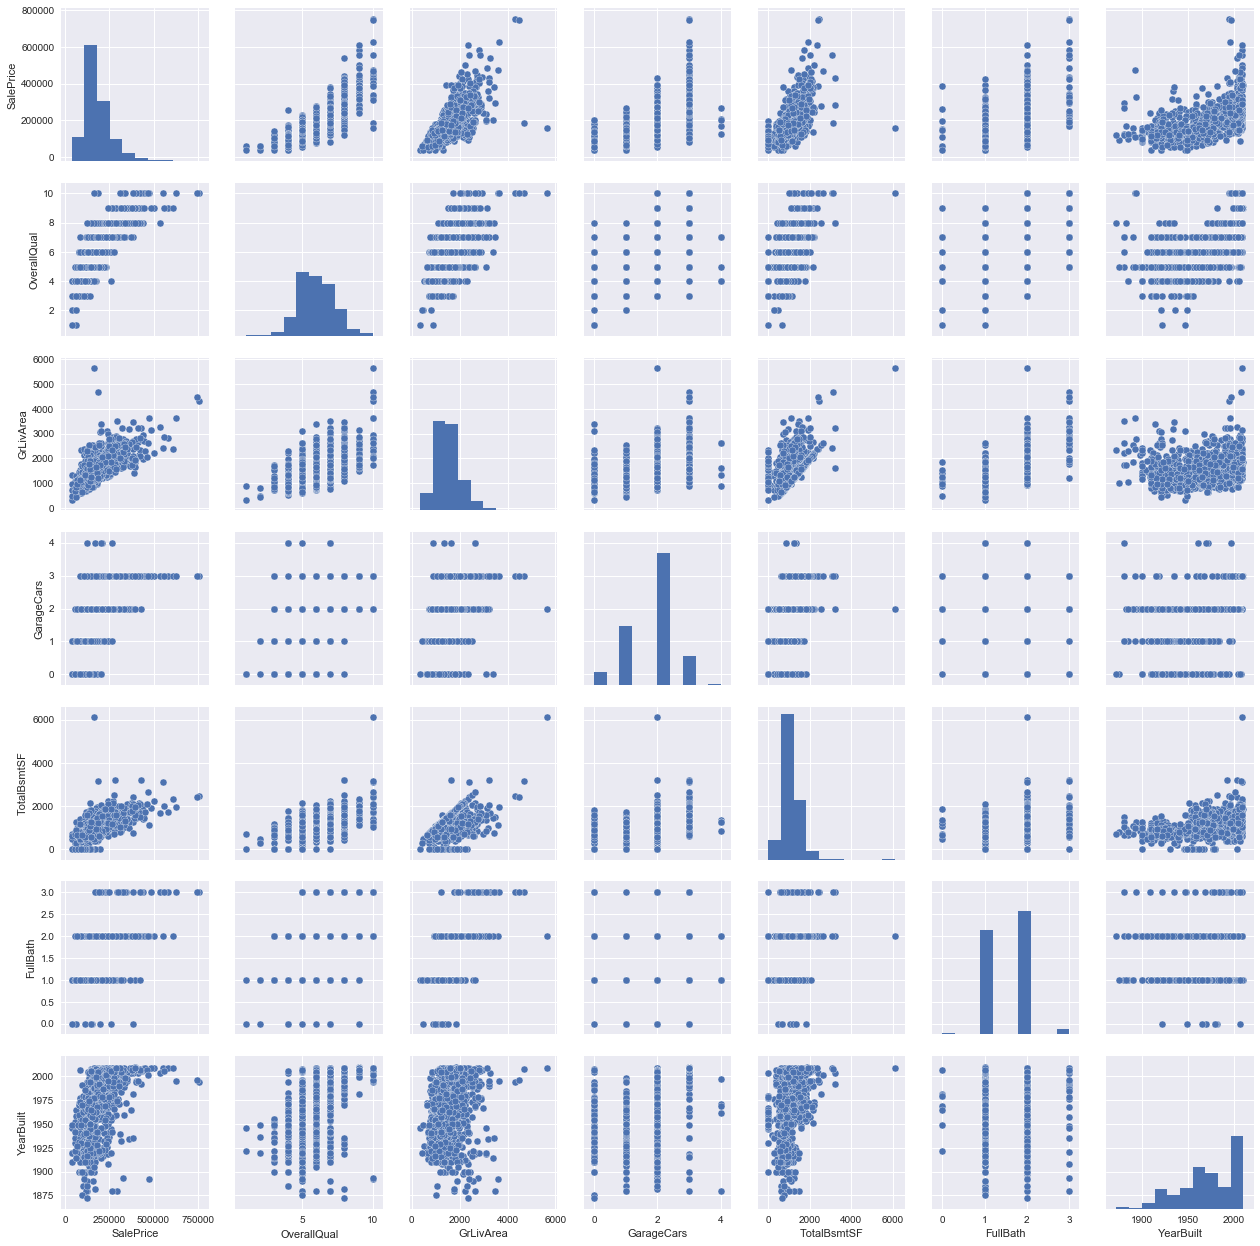

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

## EDA

In [ ]:
#Analysing missing values in features: more than ~30%
x=data.isnull().sum()
x[x>400]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [ ]:
#Dropping features with more then 70% missing value
data1=data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)
data1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
5        6          50       RL         85.0    14115   Pave      IR1   
6        7          20       RL         75.0    10084   Pave      Reg   
7        8          60       RL          NaN    10382   Pave      IR1   
8        9          50       RM         51.0     6120   Pave      Reg   
9       10         190       RL         50.0     7420   Pave      Reg   
10      11          20       RL         70.0    11200   Pave      Reg   
11      12          60       RL         85.0    11924   Pave      IR1   
12      13          20       RL          NaN    12968   Pave      IR2   
13      14          20       RL         91.0    10652   Pave      IR1   
14      15          20       RL          NaN    10920   Pave      IR1   
15      16          45       RM         51.0     6120   Pave      Reg   
16      17          20       RL          NaN    11241   Pave      IR1   
17      18          90       RL         72.0    10791   Pave      Reg   
18      19          20       RL         66.0    13695   Pave      Reg   
19      20          20       RL         70.0     7560   Pave      Reg   
20      21          60       RL        101.0    14215   Pave      IR1   
21      22          45       RM         57.0     7449   Pave      Reg   
22      23          20       RL         75.0     9742   Pave      Reg   
23      24         120       RM         44.0     4224   Pave      Reg   
24      25          20       RL          NaN     8246   Pave      IR1   
25      26          20       RL        110.0    14230   Pave      Reg   
26      27          20       RL         60.0     7200   Pave      Reg   
27      28          20       RL         98.0    11478   Pave      Reg   
28      29          20       RL         47.0    16321   Pave      IR1   
29      30          30       RM         60.0     6324   Pave      IR1   
30      31          70  C (all)         50.0     8500   Pave      Reg   
31      32          20       RL          NaN     8544   Pave      IR1   
32      33          20       RL         85.0    11049   Pave      Reg   
33      34          20       RL         70.0    10552   Pave      IR1   
34      35         120       RL         60.0     7313   Pave      Reg   
35      36          60       RL        108.0    13418   Pave      Reg   
36      37          20       RL        112.0    10859   Pave      Reg   
37      38          20       RL         74.0     8532   Pave      Reg   
38      39          20       RL         68.0     7922   Pave      Reg   
39      40          90       RL         65.0     6040   Pave      Reg   
40      41          20       RL         84.0     8658   Pave      Reg   
41      42          20       RL        115.0    16905   Pave      Reg   
42      43          85       RL          NaN     9180   Pave      IR1   
43      44          20       RL          NaN     9200   Pave      IR1   
44      45          20       RL         70.0     7945   Pave      Reg   
45      46         120       RL         61.0     7658   Pave      Reg   
46      47          50       RL         48.0    12822   Pave      IR1   
47      48          20       FV         84.0    11096   Pave      Reg   
48      49         190       RM         33.0     4456   Pave      Reg   
49      50          20       RL         66.0     7742   Pave      Reg   
50      51          60       RL          NaN    13869   Pave      IR2   
51      52          50       RM         52.0     6240   Pave      Reg   
52      53          90       RM        110.0     8472   Grvl      IR2   
53      54          20       RL         68.0    50271   Pave      

In [ ]:
#converting float features into int, and replacing missing values with median
##2 list's of dtype object and int: listint/listobject

listfloat=data1.columns[data1.dtypes=="float"]
data1[listfloat]=data1[listfloat].fillna(0.0).astype(int)

listobject=data1.columns[data1.dtypes=="object"]
listint=data1.columns[data1.dtypes=="int"]
data1[listint]=data1[listint].fillna(np.median)

data1[listint]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60           65     8450            7            5   
1        2          20           80     9600            6            8   
2        3          60           68    11250            7            5   
3        4          70           60     9550            7            5   
4        5          60           84    14260            8            5   
5        6          50           85    14115            5            5   
6        7          20           75    10084            8            5   
7        8          60            0    10382            7            6   
8        9          50           51     6120            7            5   
9       10         190           50     7420            5            6   
10      11          20           70    11200            5            5   
11      12          60           85    11924            9            5   
12      13          20            0    12968            5            6   
13      14          20           91    10652            7            5   
14      15          20            0    10920            6            5   
15      16          45           51     6120            7            8   
16      17          20            0    11241            6            7   
17      18          90           72    10791            4            5   
18      19          20           66    13695            5            5   
19      20          20           70     7560            5            6   
20      21          60          101    14215            8            5   
21      22          45           57     7449            7            7   
22      23          20           75     9742            8            5   
23      24         120           44     4224            5            7   
24      25          20            0     8246            5            8   
25      26          20          110    14230            8            5   
26      27          20           60     7200            5            7   
27      28          20           98    11478            8            5   
28      29          20           47    16321            5            6   
29      30          30           60     6324            4            6   
30      31          70           50     8500            4            4   
31      32          20            0     8544            5            6   
32      33          20           85    11049            8            5   
33      34          20           70    10552            5            5   
34      35         120           60     7313            9            5   
35      36          60          108    13418            8            5   
36      37          20          112    10859            5            5   
37      38          20           74     8532            5            6   
38      39          20           68     7922            5            7   
39      40          90           65     6040            4            5   
40      41          20           84     8658            6            5   
41      42          20          115    16905            5            6   
42      43          85            0     9180            5            7   
43      44          20            0     9200            5            6   
44      45          20           70     7945            5            6   
45      46         120           61     7658            9            5   
46      47          50           48    12822            7            5   
47      48          20           84    11096            8            5   
48      49         190           33     4456            4            5   
49      50          20           66     7742            5            7   
50      51          60            0    13869            6            6   
51      52          50           52     6240            6            6   
52      53          90          110     8472            5            5   
53      54  

In [ ]:
#Dummy Variables for categorical data
dumm=pd.get_dummies(data1[listobject],drop_first=False ,prefix=listobject)
data1=data1.drop(listobject,axis=1)
data1=pd.concat((data1,dumm),axis=1)
data1

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60           65     8450            7            5   
1        2          20           80     9600            6            8   
2        3          60           68    11250            7            5   
3        4          70           60     9550            7            5   
4        5          60           84    14260            8            5   
5        6          50           85    14115            5            5   
6        7          20           75    10084            8            5   
7        8          60            0    10382            7            6   
8        9          50           51     6120            7            5   
9       10         190           50     7420            5            6   
10      11          20           70    11200            5            5   
11      12          60           85    11924            9            5   
12      13          20            0    12968            5            6   
13      14          20           91    10652            7            5   
14      15          20            0    10920            6            5   
15      16          45           51     6120            7            8   
16      17          20            0    11241            6            7   
17      18          90           72    10791            4            5   
18      19          20           66    13695            5            5   
19      20          20           70     7560            5            6   
20      21          60          101    14215            8            5   
21      22          45           57     7449            7            7   
22      23          20           75     9742            8            5   
23      24         120           44     4224            5            7   
24      25          20            0     8246            5            8   
25      26          20          110    14230            8            5   
26      27          20           60     7200            5            7   
27      28          20           98    11478            8            5   
28      29          20           47    16321            5            6   
29      30          30           60     6324            4            6   
30      31          70           50     8500            4            4   
31      32          20            0     8544            5            6   
32      33          20           85    11049            8            5   
33      34          20           70    10552            5            5   
34      35         120           60     7313            9            5   
35      36          60          108    13418            8            5   
36      37          20          112    10859            5            5   
37      38          20           74     8532            5            6   
38      39          20           68     7922            5            7   
39      40          90           65     6040            4            5   
40      41          20           84     8658            6            5   
41      42          20          115    16905            5            6   
42      43          85            0     9180            5            7   
43      44          20            0     9200            5            6   
44      45          20           70     7945            5            6   
45      46         120           61     7658            9            5   
46      47          50           48    12822            7            5   
47      48          20           84    11096            8            5   
48      49         190           33     4456            4            5   
49      50          20           66     7742            5            7   
50      51          60            0    13869            6            6   
51      52          50           52     6240            6            6   
52      53          90          110     8472            5            5   
53      54  

In [ ]:
#Modifying year columns by subtracting from 2021(dont work properly:if one works, other shows year as it was)
data1.loc[:,["YearBuilt","YearRemodAdd","GarageYrBlt"]]=data1.loc[:,["YearBuilt","YearRemodAdd","GarageYrBlt"]].apply(lambda x : 2021-x)

In [ ]:
#Dividing data in test and train set
data1_train,data1_test=train_test_split(data1,train_size=0.7, random_state=100)
#Scaling the data for further modelling
scaler=MinMaxScaler()
data1_train.loc[:,listint]=scaler.fit_transform(data1_train.loc[:,listint])
data1_test.loc[:,listint]=scaler.transform(data1_test.loc[:,listint])

In [ ]:
#Creating X,y for both train and test set
y_train=data1_train.pop("SalePrice")
X_train=data1_train
y_test=data1_test.pop("SalePrice")
X_test=data1_test

In [ ]:
#Building model using features having more then 0.2 co-relation with target variable
#Rest RFE will choose

In [ ]:
x=np.array(data1.columns[abs(data1.corr()["SalePrice"])>0.2 ])
x=[i for i in x if i!='SalePrice' ]
X_train1=X_train[x]
X_train1=X_train1.drop("2ndFlrSF",axis=1)  #gives high vif value(multicollinearty)

In [ ]:
#Using RFE for feature selection and using linear regression for building model(trial and error:15 features)
lm1 = LinearRegression()
lm1.fit(X_train1, y_train)

rfe = RFE(lm1, 15)             # running RFE
rfe = rfe.fit(X_train1, y_train)
col = X_train1.columns[rfe.support_]
X_train1.columns[~rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train1[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     344.1
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:43:06   Log-Likelihood:                 1732.9
No. Observations:                1021   AIC:                            -3434.
Df Residuals:                    1005   BIC:                            -3355.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0063 

In [ ]:
#vif of above model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
2            OverallQual  2.73
4              GrLivArea  1.92
12           BsmtQual_Ex  1.70
7             GarageCars  1.64
14        KitchenQual_Ex  1.59
3           YearRemodAdd  1.51
6             Fireplaces  1.45
10  Neighborhood_NridgHt  1.44
1                LotArea  1.24
13       BsmtExposure_Gd  1.23
9   Neighborhood_NoRidge  1.21
15        FireplaceQu_Ex  1.17
5           BsmtFullBath  1.16
8            MSZoning_RM  1.09
11  Neighborhood_StoneBr  1.07

In [ ]:
#preparing test set for prediction
X_test_lm = X_test[col]
X_test_lm = sm.add_constant(X_test_lm)

In [ ]:
y_pred_test = lm.predict(X_test_lm)
y_pred_train =lm.predict(X_train_rfe)


In [ ]:
#Calculating metrics to analyse later


metric0 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2train=",r2_train_lr)
metric0.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2test=",r2_test_lr)
metric0.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rsstrain=",rss1_lr)
metric0.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rsstest=",rss2_lr)
metric0.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("msetrain=",mse_train_lr)
metric0.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("msetest=",mse_test_lr)
metric0.append(mse_test_lr**0.5)

r2train= 0.8370186977946659
r2test= 0.838111784600381
rsstrain= 2.0058534344712355
rsstest= 0.8821847159229326
msetrain= 0.0019645968995800544
msetest= 0.0020095323825123747


Text(0, 0.5, 'y_pred')

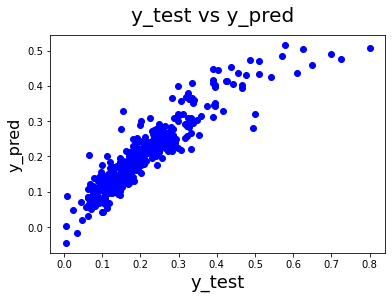

In [ ]:
# Plotting y_test and y_pred_test to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred_test, color=['b'])
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

<AxesSubplot:ylabel='Density'>

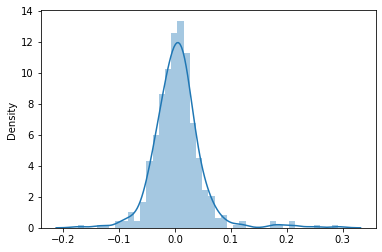

In [ ]:
#Residual Plot
sns.distplot((y_test-y_pred_test))

##Model


## Linear Regression 

In [ ]:
reg = LinearRegression() 
reg.fit(X_train,y_train)

# Print the coefficients and intercept
print(reg.intercept_)
#print(reg.coef_)

1474056474944.8186


In [ ]:
# Predictions on the basis of the model
y_pred_train= reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#R2score of training set
r2_score(y_train, y_pred_train) 

0.9486061963915803

In [ ]:
#R2score of test set
r2_score(y_test, y_pred_test) # Marketing spends account for 96.5% of the variation present in the Sales

-9.865708056387563e+21

In [ ]:
#Calculating metrics to analyse later
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2train=",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2test=",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rsstrain=",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rsstest=",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("msetrain=",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("msetest=",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2train= 0.9486061963915803
r2test= -9.865708056387563e+21
rsstrain= 0.6325169579797052
rsstest= 5.376164557511908e+22
msetrain= 0.0006195073045834527
msetest= 1.2246388513694551e+20


## Ridge Regression

In [ ]:
# list of alphas to tune 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [ ]:
#Fitting Ridge model for alpha = 0.1 and printing coefficients which have been penalised
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

Ridge(alpha=0.2)

In [ ]:
#Calculating metrics to analyse later

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2train=",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2test=",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rsstrain=",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rsstest=",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("msetrain=",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("msetest=",mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2train= 0.9432135126768946
r2test= 0.8571923428327888
rsstrain= 0.698886124281318
rsstest= 0.7782081738234564
msetrain= 0.0006845113851922802
msetest= 0.0017726837672516092


## Lasso Regression

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#X_train=X_train.drop(["OverallQual","GrLivArea","Neighborhood_NoRidge","Condition2_PosN","RoofMatl_ClyTile"],axis=1)
#X_test=X_test.drop(["OverallQual","GrLivArea","Neighborhood_NoRidge","Condition2_PosN","RoofMatl_ClyTile"],axis=1)

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [ ]:
#Fitting lasso model for alpha = 0.0001 

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [ ]:
#lasso.coef_

In [ ]:
#Calculating metrics to analyse later

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2train=",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2test=",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rsstrain=",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rsstest=",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("msetrain=",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("msetest=",mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2train= 0.9330093139828859
r2test= 0.8638016934756342
rsstrain= 0.8244718615373448
rsstest= 0.74219154281112
msetrain= 0.0008075140661482319
msetest= 0.0016906413275879727


In [ ]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rfe_metric=pd.Series(metric0, name = 'Using RFE')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rfe_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.486062e-01          0.943214          0.933009   
1   R2 Score (Test)      -9.865708e+21          0.857192          0.863802   
2       RSS (Train)       6.325170e-01          0.698886          0.824472   
3        RSS (Test)       5.376165e+22          0.778208          0.742192   
4       MSE (Train)       2.488990e-02          0.026163          0.028417   
5        MSE (Test)       1.106634e+10          0.042103          0.041117   

   Using RFE  
0   0.837019  
1   0.838112  
2   2.005853  
3   0.882185  
4   0.044324  
5   0.044828

### The trade of bias in exchange of variance can be seen clearly in the table. R2_Score of training set decreases and in exchange R2_Score of test set increases. Eliminating overfitting.

In [ ]:
#To analyse important features :Creating a table 
betas = pd.DataFrame(index=data1_train.columns)

In [ ]:
betas.rows = data1_train.columns

In [ ]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['RFE']   = lm.params

In [ ]:
pd.set_option('display.max_rows', None)
betas=betas.fillna(0.0)
betas

Linear     Ridge     Lasso       RFE
Id                     2.112919e-03  0.000734 -0.000259  0.000000
MSSubClass            -4.345217e-03 -0.012228 -0.007501  0.000000
LotFrontage            3.091890e-03 -0.003664  0.000000  0.000000
LotArea                2.355457e-01  0.137728  0.064943  0.128510
OverallQual            8.474782e-02  0.088724  0.095478  0.193240
OverallCond            6.131450e-02  0.053857  0.046953  0.000000
YearBuilt             -7.796213e-02 -0.053075 -0.031071  0.000000
YearRemodAdd          -9.086469e-03 -0.008778 -0.010071 -0.035685
MasVnrArea             4.450740e-02  0.044631  0.035740  0.000000
BsmtFinSF1             7.742983e+11  0.104306  0.053497  0.000000
BsmtFinSF2             2.022175e+11  0.021170  0.000000  0.000000
BsmtUnfSF              3.204750e+11  0.015689 -0.000000  0.000000
TotalBsmtSF           -8.382286e+11  0.107456  0.099562  0.000000
1stFlrSF              -3.627205e+11  0.153229  0.000000  0.000000
2ndFlrSF              -1.733837e+11  0.140189  0.023714  0.000000
LowQualFinSF          -4.324098e+10 -0.010998 -0.025088  0.000000
GrLivArea              4.369438e+11  0.181740  0.387730  0.262393
BsmtFullBath           7.074142e-03  0.018848  0.021693  0.039411
BsmtHalfBath           3.321676e-04  0.000939  0.000000  0.000000
FullBath              -6.325732e-04  0.013186  0.011817  0.000000
HalfBath              -1.165490e-02 -0.005766  0.000000  0.000000
BedroomAbvGr          -3.999219e-02 -0.026279 -0.008357  0.000000
KitchenAbvGr          -3.951956e-02 -0.035826 -0.022836  0.000000
TotRmsAbvGrd          -9.334894e-03  0.006192 -0.000000  0.000000
Fireplaces             1.517859e-02  0.014905  0.011666  0.031216
GarageYrBlt           -8.405547e-02  0.010282  0.002027  0.000000
GarageCars             2.530103e-02  0.042327  0.030275  0.069210
GarageArea             1.791809e-02  0.008814  0.015609  0.000000
WoodDeckSF             1.012215e-02  0.011899  0.007928  0.000000
OpenPorchSF            1.492122e-02  0.010731  0.000000  0.000000
EnclosedPorch         -6.099303e-03 -0.001471 -0.000000  0.000000
3SsnPorch              1.695057e-02  0.023293  0.000000  0.000000
ScreenPorch            7.861766e-03  0.008135  0.000465  0.000000
PoolArea               9.732819e-02  0.063328  0.027487  0.000000
MiscVal                1.818466e-02  0.007675  0.000000  0.000000
MoSold                -2.975464e-03 -0.002503 -0.001600  0.000000
YrSold                -2.593994e-03 -0.003428 -0.001174  0.000000
MSZoning_C (all)       9.185728e+10 -0.030879 -0.020189  0.000000
MSZoning_FV            9.185728e+10  0.007365  0.000000  0.000000
MSZoning_RH            9.185728e+10  0.009006  0.000000  0.000000
MSZoning_RL            9.185728e+10  0.009857  0.002943  0.000000
MSZoning_RM            9.185728e+10  0.004650 -0.004465 -0.026996
Street_Grvl            8.508533e+10 -0.015376 -0.000000  0.000000
Street_Pave            8.508533e+10  0.015376  0.000000  0.000000
LotShape_IR1           6.715525e+11  0.000814 -0.000112  0.000000
LotShape_IR2           6.715525e+11  0.000395  0.000000  0.000000
LotShape_IR3           6.715525e+11 -0.004114  0.000000  0.000000
LotShape_Reg           6.715525e+11  0.002905  0.000000  0.000000
LandContour_Bnk        2.286829e+11 -0.007470 -0.012450  0.000000
LandContour_HLS        2.286829e+11  0.004558 -0.000000  0.000000
LandContour_Low        2.286829e+11 -0.003520  0.000000  0.000000
LandContour_Lvl        2.286829e+11  0.006432  0.000000  0.000000
Utilities_AllPub      -2.113991e+11  0.012515  0.000000  0.000000
Utilities_NoSeWa      -2.113991e+11 -0.012515 -0.000000  0.000000
LotConfig_Corner      -8.044349e+11  0.000854  0.000188  0.000000
LotConfig_CulDSac     -8.044349e+11  0.014222  0.012040  0.000000
LotConfig_FR2         -8.044349e+11 -0.011982 -0.008303  0.000000
LotConfig_FR3         -8.044349e+11 -0.002251 -0.000000  0.000000
LotConfig_Inside      -8.044349e+11 -0.000843 -0.000000  0.000000
LandSlope_Gtl         -6.116887e+11  0.001171 -0.000727  0.000000
Lan

In [ ]:
betas[abs(betas["Lasso"])>0.063]

Linear     Ridge     Lasso       RFE
LotArea           2.355457e-01  0.137728  0.064943  0.128510
OverallQual       8.474782e-02  0.088724  0.095478  0.193240
TotalBsmtSF      -8.382286e+11  0.107456  0.099562  0.000000
GrLivArea         4.369438e+11  0.181740  0.387730  0.262393
Condition2_PosN   1.513724e+11 -0.385442 -0.401414  0.000000
RoofMatl_ClyTile -2.842740e+10 -0.580186 -0.618251  0.000000
RoofMatl_WdShngl -2.842740e+10  0.164325  0.075655  0.000000

In [ ]:
["OverallQual","GrLivArea","Neighborhood_NoRidge","Condition2_PosN","RoofMatl_ClyTile"]

['OverallQual',
 'GrLivArea',
 'Neighborhood_NoRidge',
 'Condition2_PosN',
 'RoofMatl_ClyTile']